In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

alat = 5.107
ecutwfn = 20
ecutrho = 4 * ecutwfn

latvec_alat = 0.5 * np.array([
    [ 1,  1,  1],
    [-1,  1,  1], 
    [-1, -1,  1]
]).T

In [3]:
from qtmpy.lattice import RealLattice

reallat = RealLattice.from_alat(alat, *latvec_alat)
for i, ax in enumerate(reallat.axes_cart):
    print(f"a{i+1} : {ax}")

l_vec_cryst = np.eye(3)
l_vec_cart = reallat.cryst2cart(l_vec_cryst, axis=1)

print(l_vec_cart)

l_vec_cart = reallat.latvec
l_vec_cryst = reallat.cart2cryst(l_vec_cart, axis=0)
print(l_vec_cryst)

l_vec_cryst = reallat.alat2cryst(l_vec_cart / reallat.alat, axis=0)
print(l_vec_cryst)

a1 : [2.5535, -2.5535, -2.5535]
a2 : [2.5535, 2.5535, -2.5535]
a3 : [2.5535, 2.5535, 2.5535]
[[ 2.5535 -2.5535 -2.5535]
 [ 2.5535  2.5535 -2.5535]
 [ 2.5535  2.5535  2.5535]]
[[ 1.00000000e+00 -5.55111512e-17 -5.55111512e-17]
 [ 0.00000000e+00  1.00000000e+00  1.66533454e-16]
 [-5.55111512e-17  5.55111512e-17  1.00000000e+00]]
[[ 1.00000000e+00 -7.08738623e-17 -7.08738623e-17]
 [ 0.00000000e+00  1.00000000e+00  1.41747725e-16]
 [-7.08738623e-17  7.08738623e-17  1.00000000e+00]]


In [4]:
from qtmpy.config import qtmconfig
from qtmpy.lattice import ReciLattice
from qtmpy.gspace.gspc import GSpace

qtmconfig.fft_backend = 'numpy'

recilat = ReciLattice.from_reallat(reallat)
grho = GSpace(recilat, ecutrho)

In [5]:
gwfn = GSpace(recilat, ecutrho/4, grid_shape=grho.grid_shape)

In [6]:
axis = 0

ni = np.delete(gwfn.grid_shape, axis, 0)
g_isticks = np.delete(gwfn.g_cryst, axis, 0)
g_isticks += (g_isticks < 0) * ni.reshape((2, 1))
g_isticks = ni[1] * g_isticks[0] + g_isticks[1]

In [7]:
g_isort = np.argsort(g_isticks)

g_cryst = gwfn.g_cryst[(slice(None), g_isort)]
g_isticks = g_isticks[g_isort]

In [8]:
sticks_idx, sticks_len = np.unique(g_isticks, return_counts=True)
numsticks = len(sticks_idx)

In [13]:
print(sticks_idx)
print(sticks_len)

[  0   1   2   3   4  14  15  16  17  18  19  20  21  22  33  34  35  36
  37  38  39  40  51  52  53  54  55  56  57  58  70  71  72  73  74  75
 252 267 268 269 270 271 272 284 285 286 287 288 289 290 291 302 303 304
 305 306 307 308 309 320 321 322 323]
[7 8 7 6 3 3 6 7 8 8 7 6 5 4 5 6 7 7 6 7 6 3 2 5 6 6 5 6 5 2 2 5 3 4 3 2 3
 2 3 4 6 5 2 2 5 6 5 7 6 5 2 3 6 7 6 8 7 6 5 4 5 6 7]


In [9]:
sticks_coords = np.array((sticks_idx // ni[1], sticks_idx % ni[1]))
sticks_coords -= ni.reshape((2, 1)) * (sticks_coords >= (ni // 2).reshape((2, 1)))

In [14]:
print(sticks_coords)

[[ 0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2
   2  3  3  3  3  3  3  3  4  4  4  4 -4 -4 -4 -4 -3 -3 -3 -3 -3 -3 -3 -2
  -2 -2 -2 -2 -2 -2 -2 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 0  1  2  3  4 -4 -3 -2 -1  0  1  2  3  4 -3 -2 -1  0  1  2  3  4 -3 -2
  -1  0  1  2  3  4 -2 -1  0  1  2  3  0 -3 -2 -1  0  1  2 -4 -3 -2 -1  0
   1  2  3 -4 -3 -2 -1  0  1  2  3 -4 -3 -2 -1]]


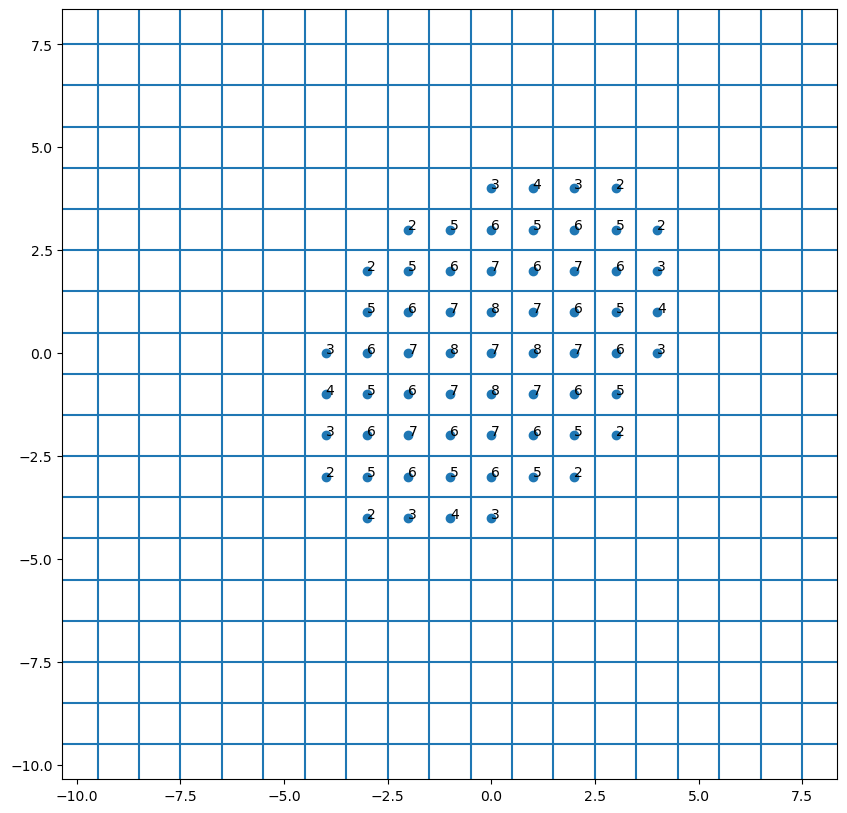

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))

# plt.xlim(-ni[0]/2, ni[0]/2)
# plt.ylim(-ni[1]/2, ni[1]/2)

for ix in np.fft.fftfreq(ni[0], 1/ni[0]):
    plt.axvline(ix - 0.5)
    plt.axhline(ix - 0.5)

plt.scatter(*sticks_coords, )
for i in range(numsticks):
    xy = sticks_coords[:, i]
    plt.annotate(sticks_len[i], sticks_coords[:, i])